In [249]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
import scipy.constants as sc
import copy
import linecache

## 物理定数

pi           = np.pi                    # PI
k_b          = sc.k*1e7                 # Boltzmann constant in erg/K
m_p          = sc.proton_mass*1e3       # proton mass in g
Grav         = sc.G*1e3                 # gravitational constant in cm^3 g^-1 s^-2
AU           = sc.au*1e2                # astronomical unit in cm
yr           = sc.Julian_year           # year in s
mu           = 2.34e0                   # mean molecular mass in proton masses
M_sun        = 1.9891e+33               # mass of the sun in g
R_sun        = 69550800000.0            # radius of the sun in cm
L_sun        = 3.828000000000000255e+33
sigmaSB      = 5.670500000000000003e-05

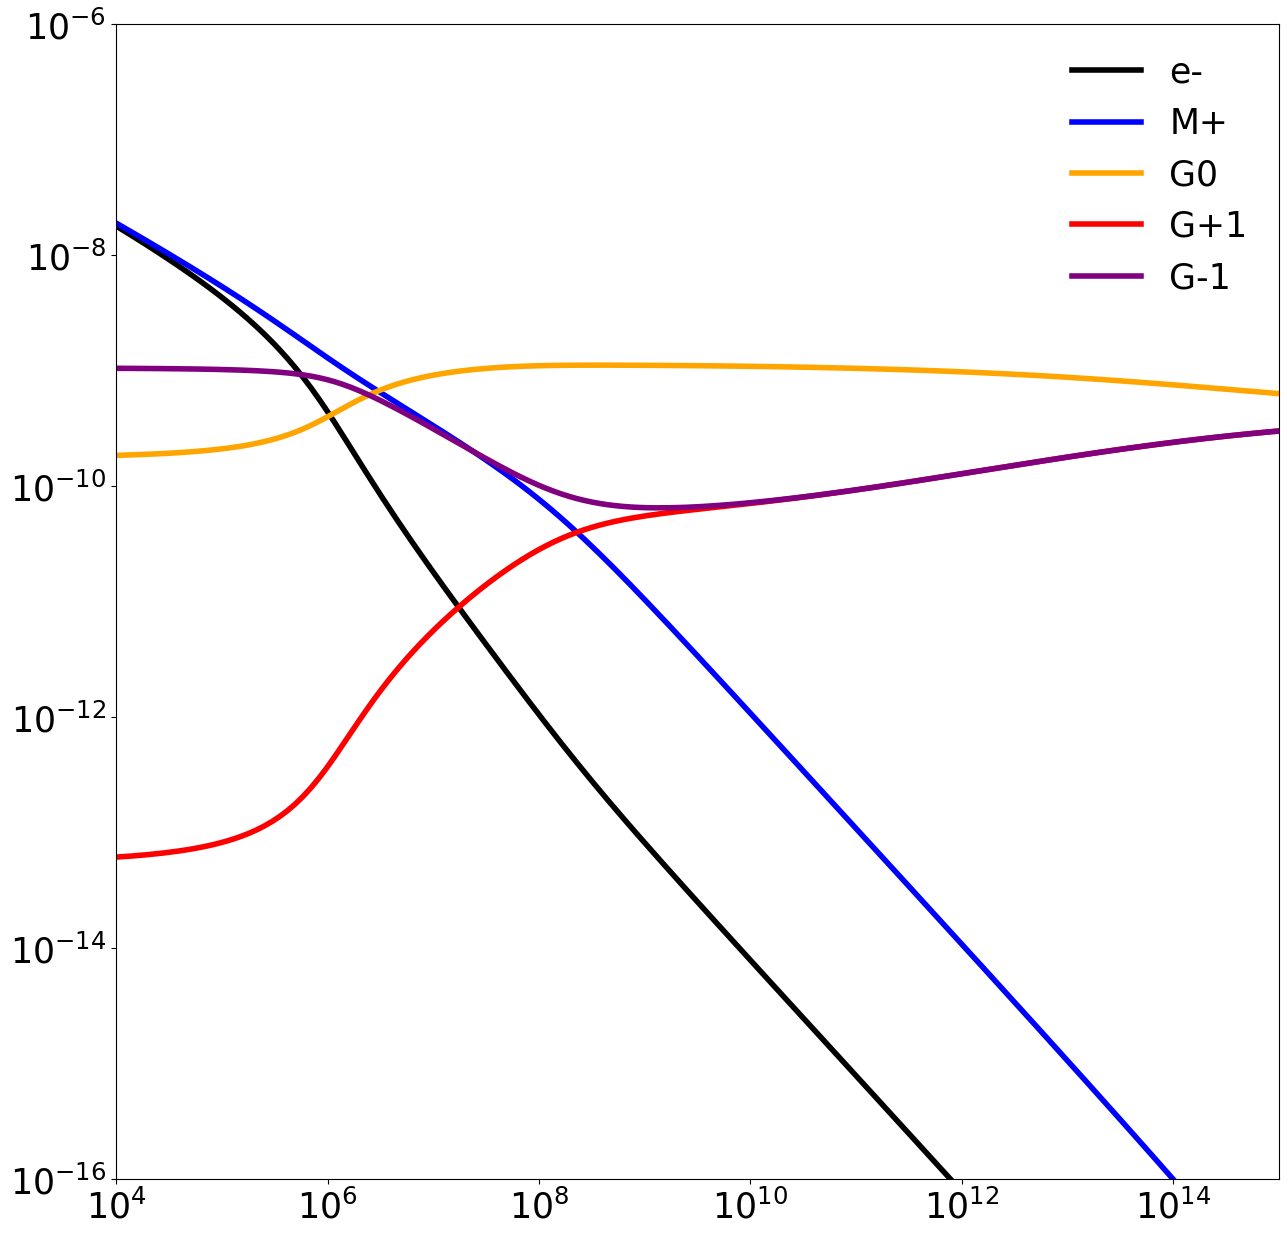

In [165]:
data = np.loadtxt("test2_MRN.txt", dtype=float).T
ng   = data[0]
T    = data[1]
xe   = data[2]
xi   = data[3]
xd0  = data[4]
xdp1 = data[5]
xdm1 = data[6]
sigmaO_e = data[7]
sigmaH_e = data[8]
sigmaP_e = data[9]
sigmaO_i = data[10]
sigmaH_i = data[11]
sigmaP_i = data[12]
sigmaO_d = data[13]
sigmaH_d = data[14]
sigmaP_d = data[15]
sigmaO   = data[16]
sigmaH   = data[17]
sigmaP   = data[18]
etaO     = data[19]
etaH     = data[20]
etaA     = data[21]

lw = 4

plt.figure(figsize=(15, 15))
plt.plot(ng, xe,   label="e-",  lw=lw, color="black")
plt.plot(ng, xi,   label="M+",  lw=lw, color="blue")
plt.plot(ng, xd0,  label="G0",  lw=lw, color="orange")
plt.plot(ng, xdp1, label="G+1", lw=lw, color="red")
plt.plot(ng, xdm1, label="G-1", lw=lw, color="purple")
plt.xscale("log")
plt.yscale("log")
plt.xlim(1.0e4, 1.0e15)
plt.ylim(1.0e-16, 1.0e-6)
plt.legend(fontsize=25, frameon=False)
plt.tick_params(labelsize=25)
plt.show()

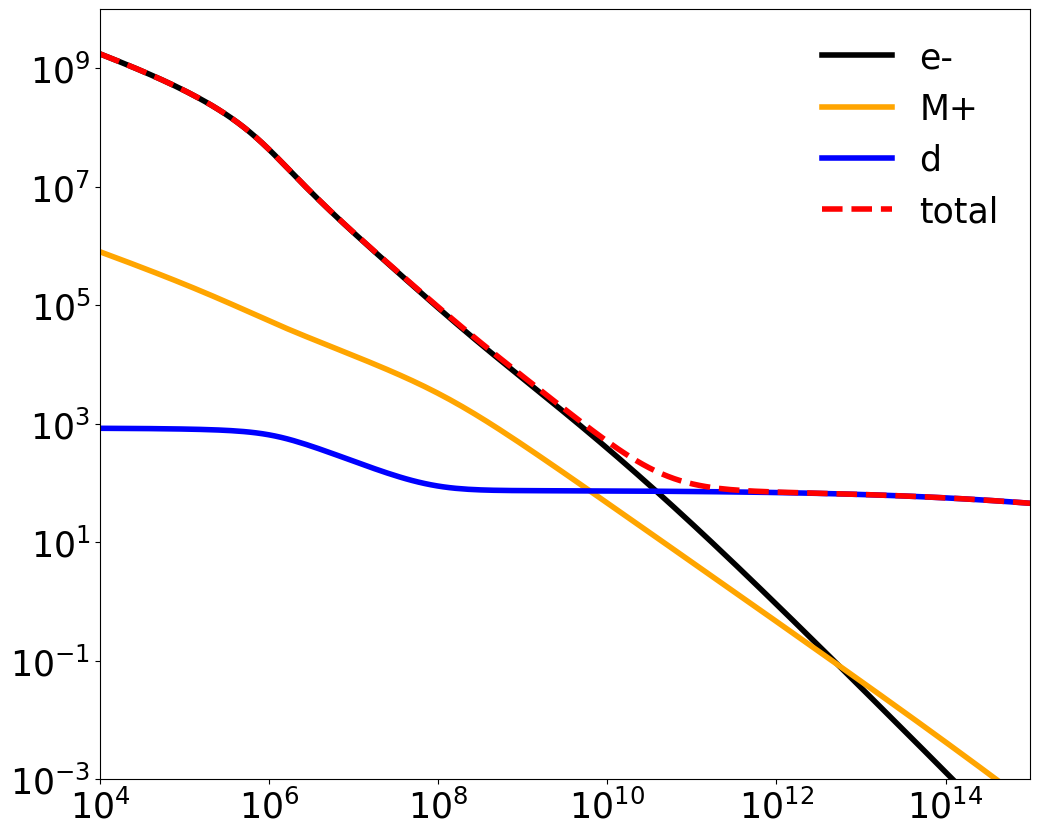

In [166]:
plt.figure(figsize=(12, 10))
plt.plot(ng, sigmaO_e,   label="e-",    lw=lw, color="black")
plt.plot(ng, sigmaO_i,   label="M+",    lw=lw, color="orange")
plt.plot(ng, sigmaO_d,   label="d",     lw=lw, color="blue")
plt.plot(ng, sigmaO,     label="total", lw=lw, color="red", linestyle="dashed")
plt.xscale("log")
plt.yscale("log")
plt.xlim(1.0e4, 1.0e15)
plt.ylim(1.0e-3, 1.0e10)
plt.legend(fontsize=25, frameon=False)
plt.tick_params(labelsize=25)
plt.show()

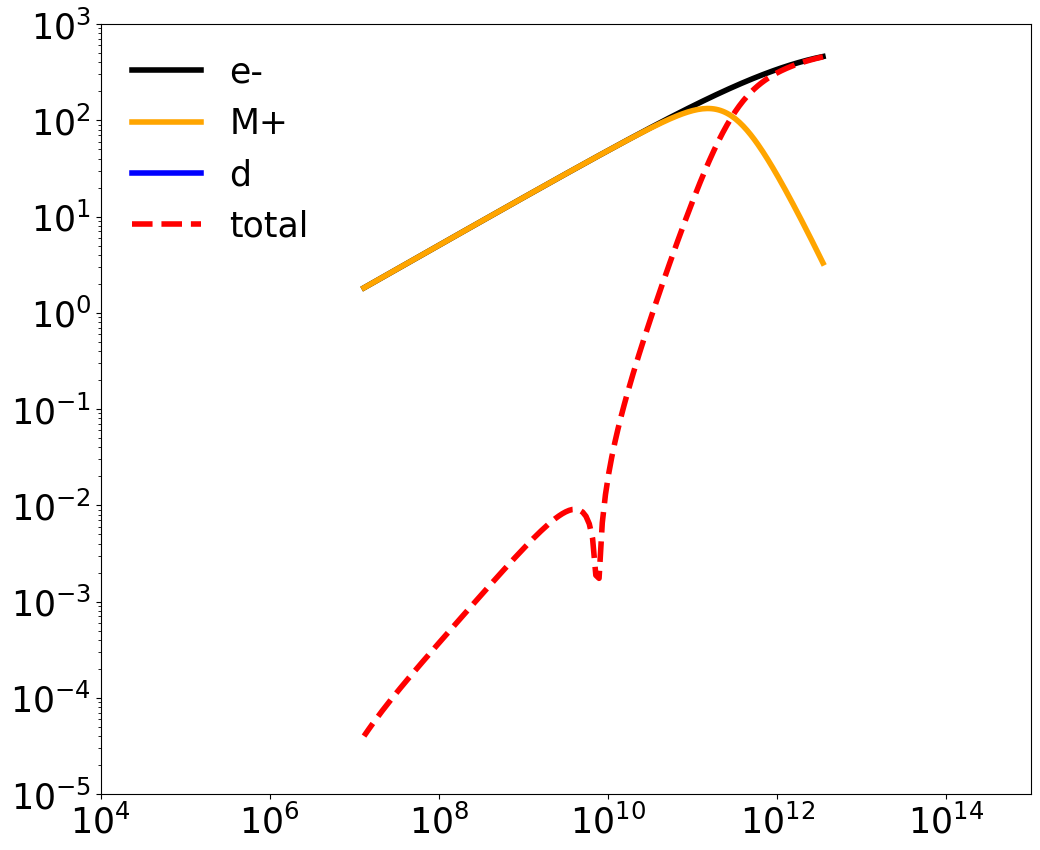

In [173]:
plt.figure(figsize=(12, 10))
plt.plot(ng, sigmaH_e,   label="e-",    lw=lw, color="black")
plt.plot(ng, np.abs(sigmaH_i),   label="M+",    lw=lw, color="orange")
plt.plot(ng, sigmaH_d,   label="d",     lw=lw, color="blue")
plt.plot(ng, np.abs(sigmaH),     label="total", lw=lw, color="red", linestyle="dashed")
# plt.plot(ng, sigmaH_e + sigmaH_d,   label="e-",    lw=lw, color="black")
# # plt.plot(ng, np.abs(sigmaH_i),   label="M+",    lw=lw, color="orange")
# plt.plot(ng, sigmaH_d,   label="d",     lw=lw, color="blue")
# plt.plot(ng, np.abs(sigmaH),     label="total", lw=lw, color="red", linestyle="dashed")
plt.xscale("log")
plt.yscale("log")
plt.xlim(1.0e4, 1.0e15)
plt.ylim(1.0e-5, 1.0e3)
plt.legend(fontsize=25, frameon=False)
plt.tick_params(labelsize=25)
plt.show()

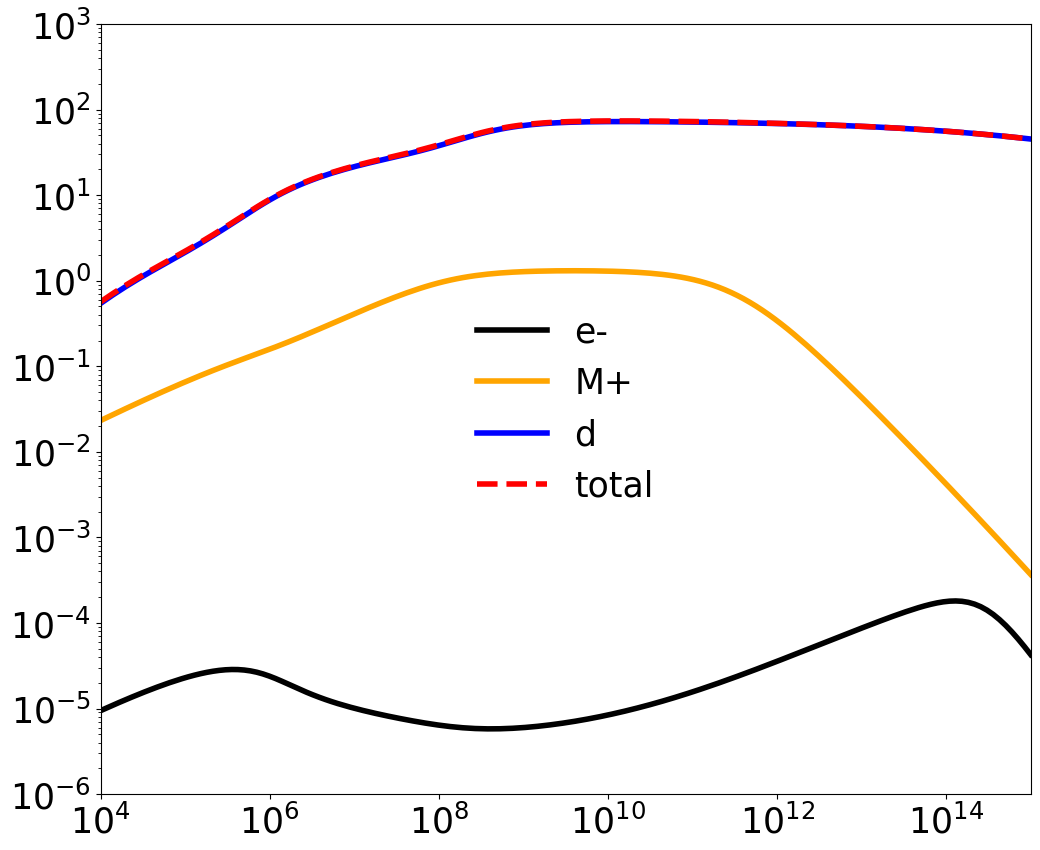

In [168]:
plt.figure(figsize=(12, 10))
plt.plot(ng, sigmaP_e,   label="e-",    lw=lw, color="black")
plt.plot(ng, sigmaP_i,   label="M+",    lw=lw, color="orange")
plt.plot(ng, sigmaP_d,   label="d",     lw=lw, color="blue")
plt.plot(ng, sigmaP,     label="total", lw=lw, color="red", linestyle="dashed")
plt.xscale("log")
plt.yscale("log")
plt.xlim(1.0e4, 1.0e15)
plt.ylim(1.0e-6, 1.0e3)
plt.legend(fontsize=25, frameon=False)
plt.tick_params(labelsize=25)
plt.show()

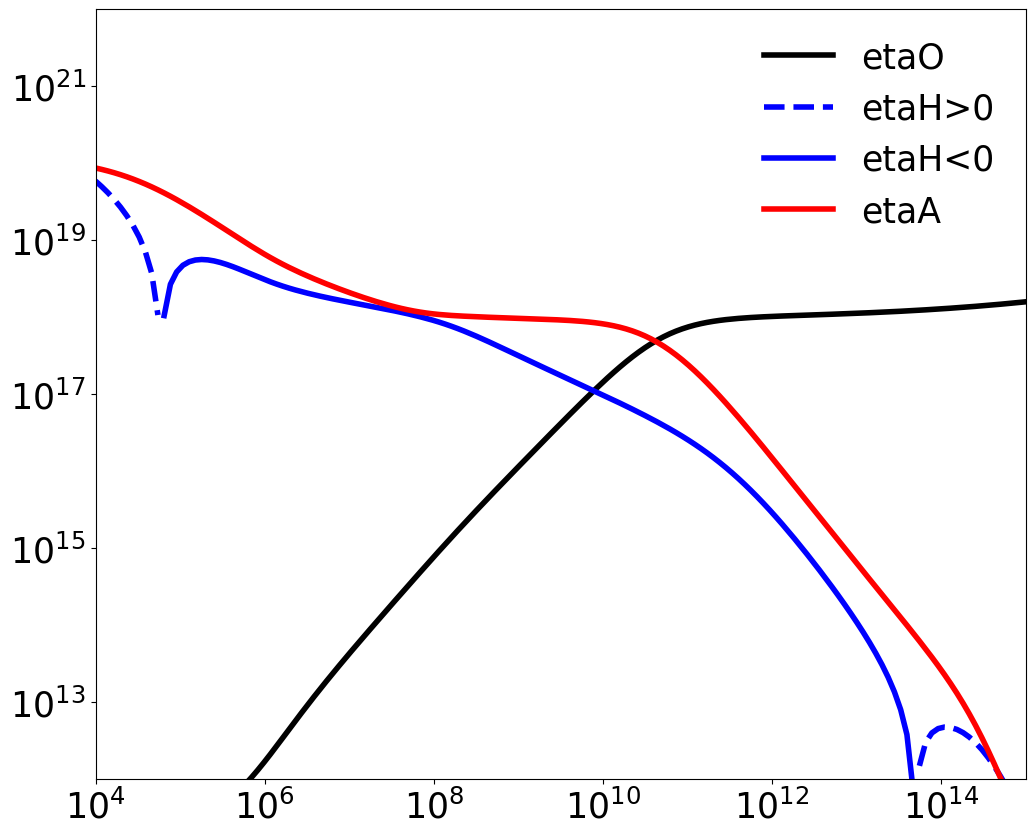

In [169]:
etaHp = np.where(etaH > 0.0, etaH, np.nan)
etaHm = np.where(etaH < 0.0, etaH, np.nan)

plt.figure(figsize=(12, 10))
plt.plot(ng, etaO,            label="etaO",   lw=lw, color="black")
plt.plot(ng, np.abs(etaHp),   label="etaH>0", lw=lw, color="blue",  linestyle="dashed")
plt.plot(ng, np.abs(etaHm),   label="etaH<0", lw=lw, color="blue")
plt.plot(ng, etaA,            label="etaA",   lw=lw, color="red")
plt.xscale("log")
plt.yscale("log")
plt.xlim(1.0e4, 1.0e15)
plt.ylim(1.0e12, 1.0e22)
plt.legend(fontsize=25, frameon=False)
plt.tick_params(labelsize=25)
plt.show()

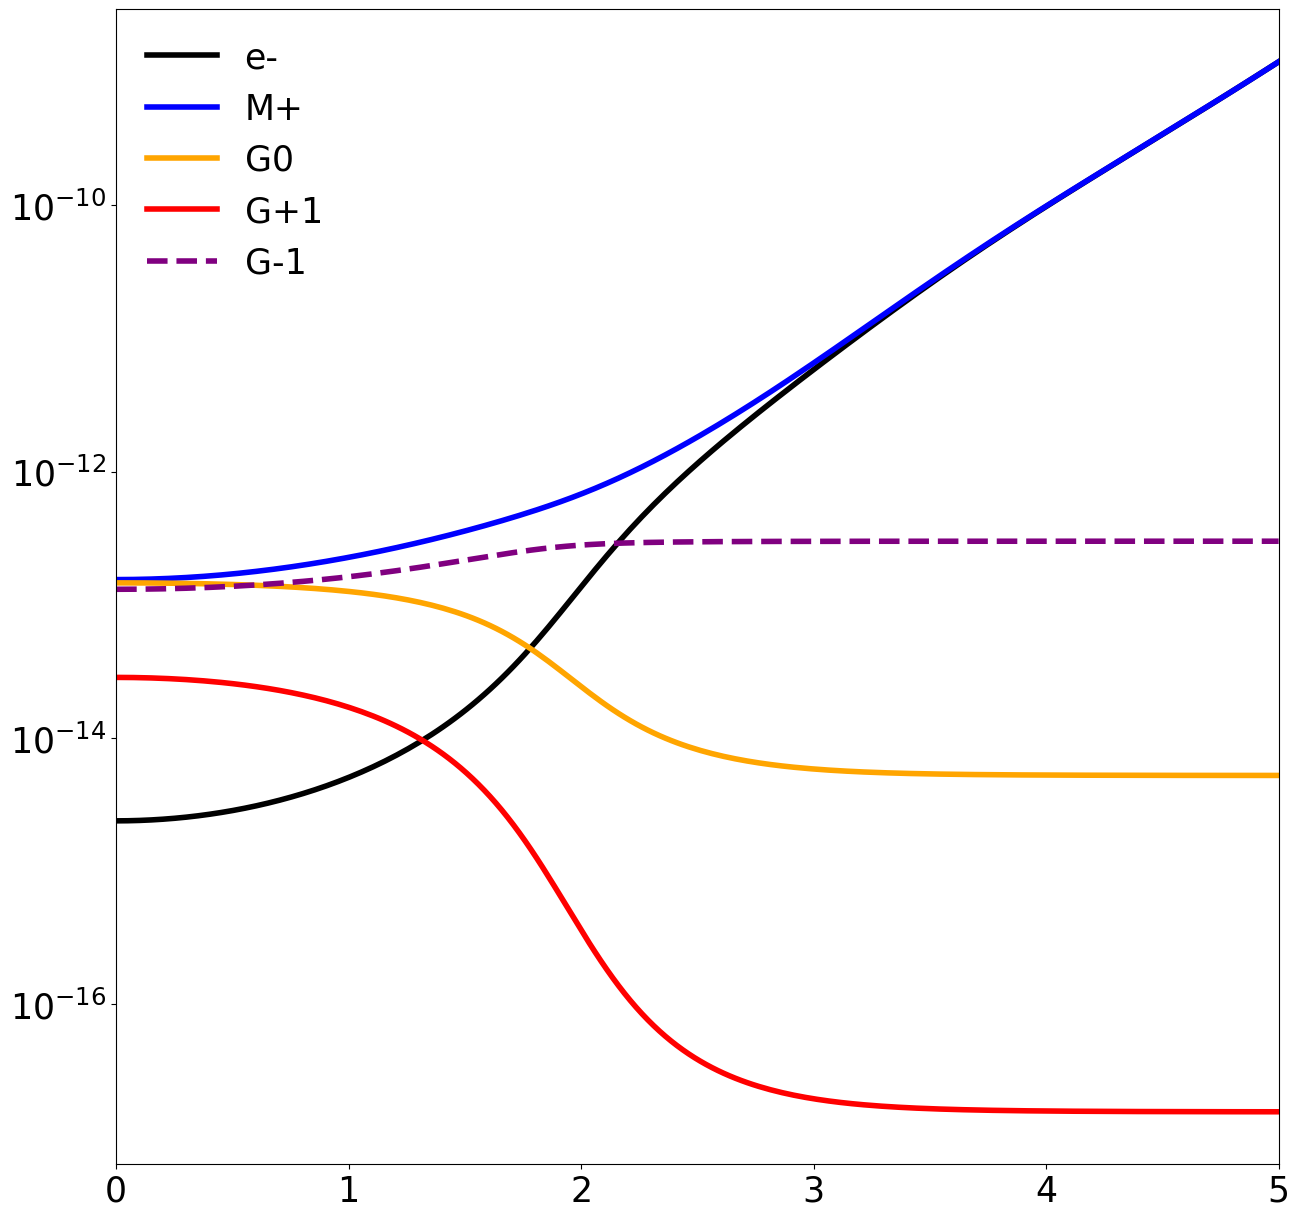

In [291]:
data = np.loadtxt("test3.txt", dtype=float).T
zH   = data[0]
ng   = data[1]
xe   = data[2]
xi   = data[3]
xd0  = data[4]
xdp1 = data[5]
xdm1 = data[6]
sigmaO_e = data[7]
sigmaH_e = data[8]
sigmaP_e = data[9]
sigmaO_i = data[10]
sigmaH_i = data[11]
sigmaP_i = data[12]
sigmaO_d = data[13]
sigmaH_d = data[14]
sigmaP_d = data[15]
sigmaO   = data[16]
sigmaH   = data[17]
sigmaP   = data[18]
etaO     = data[19]
etaH     = data[20]
etaA     = data[21]
elsO     = data[22]
elsH     = data[23]
elsA     = data[24]

lw = 4

x = zH

plt.figure(figsize=(15, 15))
plt.plot(x, xe,   label="e-",  lw=lw, color="black")
plt.plot(x, xi,   label="M+",  lw=lw, color="blue")
plt.plot(x, xd0,  label="G0",  lw=lw, color="orange")
plt.plot(x, xdp1, label="G+1", lw=lw, color="red")
plt.plot(x, xdm1, label="G-1", lw=lw, color="purple", linestyle="dashed")
# plt.xscale("log")
plt.yscale("log")
plt.xlim(0.0, 5.0)
# plt.ylim(1.0e-16, 1.0e-6)
plt.legend(fontsize=25, frameon=False)
plt.tick_params(labelsize=25)
plt.show()

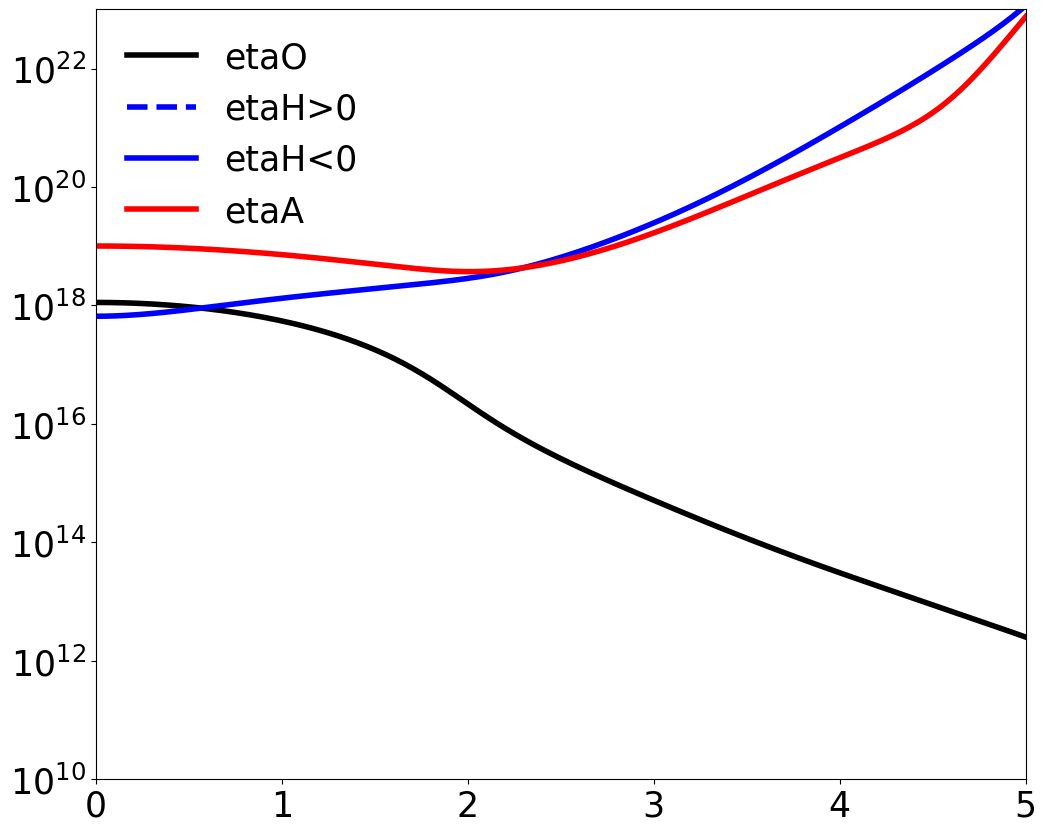

In [292]:
etaHp = np.where(etaH > 0.0, etaH, np.nan)
etaHm = np.where(etaH < 0.0, etaH, np.nan)

plt.figure(figsize=(12, 10))
plt.plot(x, etaO,            label="etaO",   lw=lw, color="black")
plt.plot(x, np.abs(etaHp),   label="etaH>0", lw=lw, color="blue",  linestyle="dashed")
plt.plot(x, np.abs(etaHm),   label="etaH<0", lw=lw, color="blue")
plt.plot(x, etaA,            label="etaA",   lw=lw, color="red")
# plt.xscale("log")
plt.yscale("log")
plt.xlim(0.0, 5.0)
plt.ylim(1.0e10, 1.0e23)
plt.legend(fontsize=25, frameon=False)
plt.tick_params(labelsize=25)
plt.show()

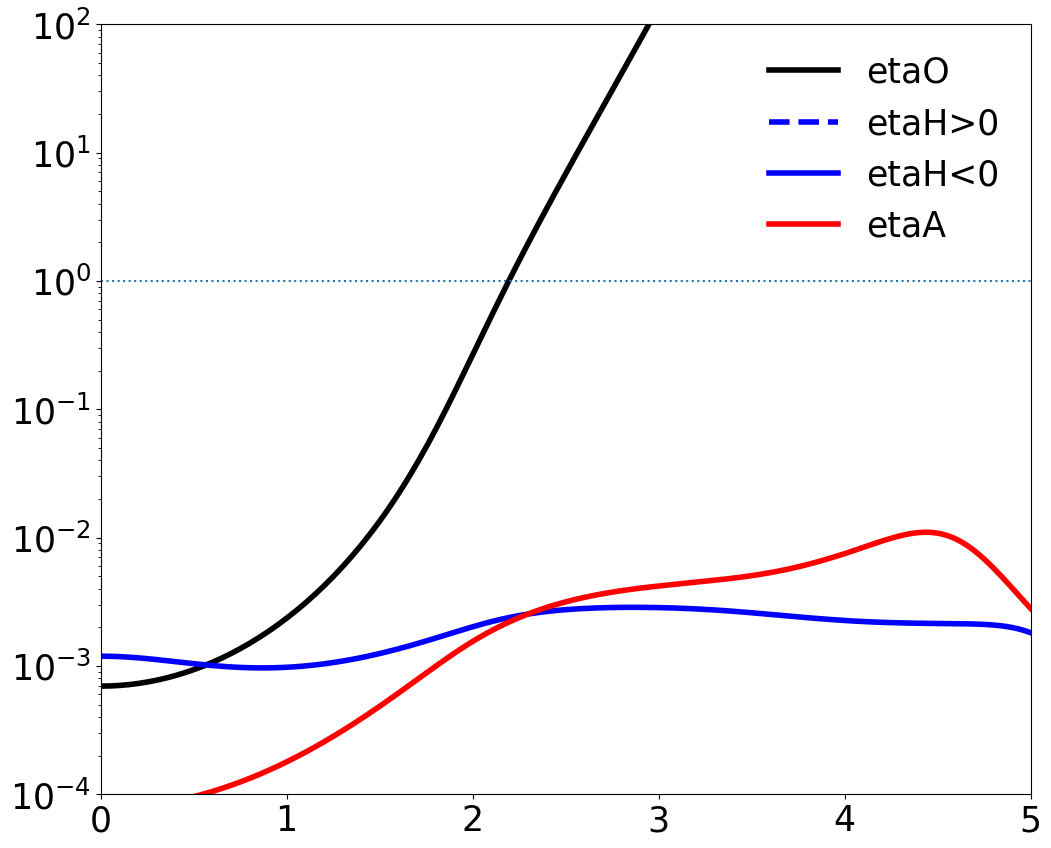

In [293]:
elsHp = np.where(elsH > 0.0, elsH, np.nan)
elsHm = np.where(elsH < 0.0, elsH, np.nan)

plt.figure(figsize=(12, 10))
plt.plot(x, elsO,            label="etaO",   lw=lw, color="black")
plt.plot(x, np.abs(elsHp),   label="etaH>0", lw=lw, color="blue",  linestyle="dashed")
plt.plot(x, np.abs(elsHm),   label="etaH<0", lw=lw, color="blue")
plt.plot(x, elsA,            label="etaA",   lw=lw, color="red")
one = np.ones(len(x))
plt.plot(x, one, linestyle="dotted")
# plt.xscale("log")
plt.yscale("log")
plt.xlim(0.0, 5.0)
plt.ylim(1.0e-4, 1.0e2)
plt.legend(fontsize=25, frameon=False)
plt.tick_params(labelsize=25)
plt.show()

In [287]:
print(ng)

[7.225652e-12 7.223372e-12 7.216535e-12 7.205155e-12 7.189252e-12
 7.168858e-12 7.144009e-12 7.114755e-12 7.081148e-12 7.043252e-12
 7.001138e-12 6.954883e-12 6.904574e-12 6.850303e-12 6.792169e-12
 6.730279e-12 6.664744e-12 6.595681e-12 6.523215e-12 6.447474e-12
 6.368590e-12 6.286701e-12 6.201949e-12 6.114478e-12 6.024436e-12
 5.931975e-12 5.837246e-12 5.740405e-12 5.641607e-12 5.541011e-12
 5.438775e-12 5.335055e-12 5.230011e-12 5.123799e-12 5.016577e-12
 4.908498e-12 4.799717e-12 4.690385e-12 4.580650e-12 4.470660e-12
 4.360557e-12 4.250481e-12 4.140570e-12 4.030955e-12 3.921765e-12
 3.813125e-12 3.705155e-12 3.597970e-12 3.491681e-12 3.386393e-12
 3.282207e-12 3.179219e-12 3.077519e-12 2.977192e-12 2.878318e-12
 2.780972e-12 2.685222e-12 2.591133e-12 2.498763e-12 2.408164e-12
 2.319386e-12 2.232471e-12 2.147457e-12 2.064376e-12 1.983258e-12
 1.904124e-12 1.826994e-12 1.751883e-12 1.678799e-12 1.607748e-12
 1.538733e-12 1.471751e-12 1.406797e-12 1.343860e-12 1.282929e-12
 1.223988e

In [188]:
a = (1.0 / (4.0*np.pi*np.sqrt(Grav))) * 1e-8 * (10.0*AU)**(3.0/2.0) * (1.0 / np.sqrt(0.1*M_sun))
print("{:e}".format(a))

3.996199e-01


In [248]:
Ms   = 0.1 * M_sun
# rhog = 3.0e-12
rhog = 3.0e-11
r    = 10.0 * AU
B    = 0.1
etaA = 1e18

Omega = np.sqrt(Grav * Ms / (r**3.0))
vA    = B / np.sqrt(4.0 * np.pi * rhog)
Am    = vA**2.0 / (Omega * etaA)

print(Am)


0.013320662619544172


In [107]:
plt.figure(figsize=(12, 10))
plt.plot(x, sigmaO_e,   label="e-",    lw=lw, color="black")
plt.plot(x, sigmaO_i,   label="M+",    lw=lw, color="orange")
plt.plot(x, sigmaO_d,   label="d",     lw=lw, color="blue")
plt.plot(x, sigmaO,     label="total", lw=lw, color="red", linestyle="dashed")
# plt.xscale("log")
plt.yscale("log")
plt.xlim(1.0e4, 1.0e15)
plt.ylim(1.0e-3, 1.0e10)
plt.legend(fontsize=25, frameon=False)
plt.tick_params(labelsize=25)
plt.show()

[2.087388e-10 2.087388e-10 2.087388e-10 2.087388e-10 2.087388e-10
 2.087388e-10 2.087388e-10 2.087388e-10 2.087388e-10 2.087388e-10
 2.087388e-10 2.087388e-10 2.087388e-10 2.087388e-10 2.087388e-10
 2.087388e-10 2.087388e-10 2.087388e-10 2.087388e-10 2.087388e-10
 2.087388e-10 2.087388e-10 2.087388e-10 2.087387e-10 2.087387e-10
 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10
 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10
 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10
 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10
 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10
 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10
 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10
 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10
 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10
 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10 2.087387e-10
 2.087387e